In [1]:
import sys
 
# setting path
sys.path.append('../')

import pydicom

from utils.display import display_dicom

In [2]:
sample_dcm_path = "/home/r079a/Desktop/de-identification/dataset/midi-test-data/input_data_half/5385276325/2.2.198.1.2.3201303.1.133.2060576467015112313/2.2.198.1.2.3201303.1.133.1413062493524911853/00000001.dcm"

In [3]:
ds = pydicom.dcmread(sample_dcm_path)

In [4]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 178
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.2.198.1.2.3201303.1.133.1256435135191428349
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20150408'
(0008, 0013) Instance Creation Time              TM: '070540'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID            

In [5]:
for element in ds.elements():
    if element.VR == 'OW':
        print(element.tag, element.name)
        # print(element.value)

(7fe0, 0010) Pixel Data


In [6]:
print(ds.pixel_array.shape)

(512, 512)


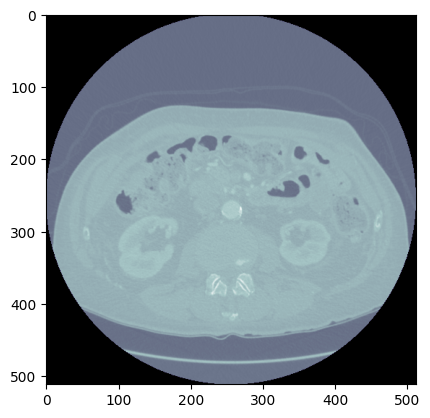

In [7]:
display_dicom(ds)

In [8]:
from dcm_anonymizers.phi_detectors import DcmRobustPHIDetector
from dcm_anonymizers.img_anonymizers import DCMImageAnonymizer
from dcm_anonymizers.tcia_deid import DCMTCIAAnonymizer
from dcm_anonymizers.private_tags_extractor import PrivateTagsExtractorV2

In [9]:
phi_detector = DcmRobustPHIDetector(logging=False)
# img_anonymizer = DCMImageAnonymizer(phi_detector=phi_detector)

ptags_extr = PrivateTagsExtractorV2(private_tags_dict_path='../dcm_anonymizers/tcia_private_tags_dict.json')
anonymizer = DCMTCIAAnonymizer(
    phi_detector=None,
    notes_phi_detector=phi_detector,
    soft_detection=True,
    private_tags_extractor=ptags_extr,
    rules_json_path='../dcm_anonymizers/tcia_deid_attrs.json'
)

[2024-09-04 20:44:57,995] [   DEBUG] ps_3_3.py:97 - PS3.3 init
[2024-09-04 20:44:57,996] [   DEBUG] tcia_deid.py:67 - TCIA anonymizer init


In [10]:
# changed = img_anonymizer.anonymize_dicom_image_data(ds)
# print(changed)

In [11]:
# display_dicom(ds)

In [12]:
anonymizer.anonymize_dataset(ds)

[2024-09-04 20:44:59,343] [   DEBUG] tcia_deid.py:212 - Date has been shifted from 1073818011 to 1084182411.0 from timestamp format


In [13]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 178
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.93022066515987571642890591110157365037
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20150806'
(0008, 0013) Instance Creation Time              TM: '070540'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Insta